In [2]:
!python -V

Python 3.9.12


In [4]:
import pandas as pd

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

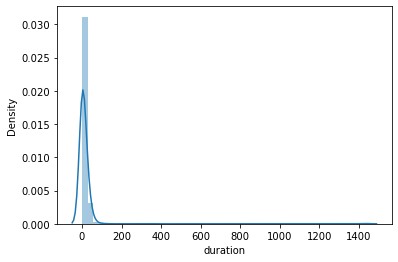

In [39]:
sns.distplot(df.duration)

In [85]:
def read_dataframe(filename) :   
    df=pd.read_parquet(filename)
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60) 

    df =  df [(df.duration >=1) & (df.duration<=60)]
    catego = ['PULocationID' ,  'DOLocationID' ]
    numer= ['trip_distance']

    df[catego] = df[catego].astype(str)
    
    return df

In [86]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')
 


In [87]:
len(df_train ) , len(df_val)

(54373, 51497)

In [51]:
#df = df[df.trip_type==2]

In [53]:
    
    train_dict = df[catego + numer ].to_dict(orient='records')


    dv = DictVectorizer()
    x_train = dv.fit_transform(train_dict)

    target = 'duration'
    y_train = df [target].values


    y_pred = lr.predict(x_train)

    mean_squared_error(y_train , y_pred , squared= False )

<1736x342 sparse matrix of type '<class 'numpy.float64'>'
	with 5208 stored elements in Compressed Sparse Row format>

In [61]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=11',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=119',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=129',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',
 'DOLocationID=15',
 'DOLocationID=150',
 'DOLocationID=151',
 'DOLocationID=152',
 'DOLocationID=157',
 'DOLocationID=158',
 'DOLocationID=159',
 'DOLocationID=16',
 'DOLocationID=160',

In [68]:
y_train

array([1.33333333e-01, 1.66666667e-02, 1.52666667e+01, ...,
       2.66333333e+01, 2.16666667e-01, 2.10000000e+00])

LinearRegression()

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


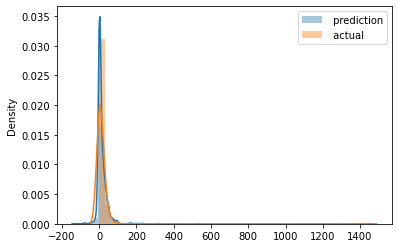

In [77]:
sns.distplot(y_pred , label= ' prediction')
sns.distplot(y_train , label= ' actual')

plt.legend()

67.6332052992125